Count thenumber of nuclei in each field of view (fov)

-- Develop a method on a single field of view

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from skimage import filters, measure, morphology
import glob
import os  

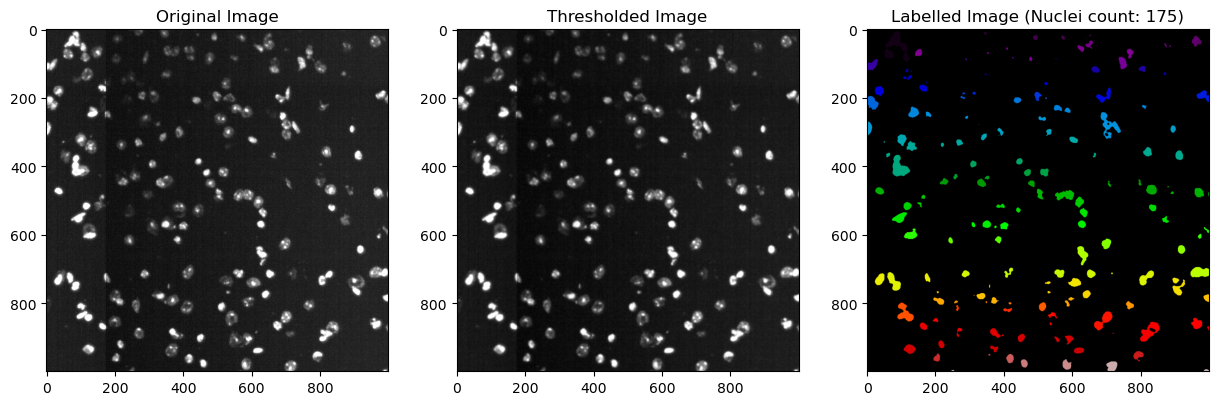

In [3]:
path = r'C:\Users\s369577\Desktop\F1 CCTB\data\selected-tiles\selected-tiles\out_opt_flow_registered_X10_Y10_c01_DAPI.tif'
image = np.array(Image.open(path).convert("L"))

#BLUR
blurred = filters.gaussian(image, sigma=1)

#Treshhold
threshold_value = filters.threshold_otsu(blurred)
binary = blurred > threshold_value

#Enhancing
closed = morphology.binary_closing(binary, morphology.disk(3))

#Labeling + identify
labels = measure.label(closed)

#counting
nuclei_count = np.max(labels)

#Visualize
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(blurred, cmap='gray')
ax[1].set_title('Thresholded Image')
ax[2].imshow(labels, cmap='nipy_spectral')
ax[2].set_title(f'Labelled Image (Nuclei count: {nuclei_count})')
plt.show()



Multiple FOV

In [2]:
path_mfov = r'C:\Users\s369577\Desktop\F1 CCTB\data\selected-tiles\selected-tiles'
image_files = glob.glob(path_mfov + r'/out_opt_flow_registered_*.tif')

results = []

#Directionary to save diagnostic plots
output_dir = r"C:\Users\s369577\Desktop\F1 CCTB\data\Diagnostic plots"
os.makedirs(output_dir, exist_ok=True)


#BLUR
for image_path in image_files:

    base_name = os.path.basename(image_path)
    filename_parts = base_name.split('registered_')[-1].split()
    #print(f"Processing {filename_parts}")

    #Load image
    image = np.array(Image.open(image_path).convert("L"))
    #print(f'Image shape: {image.shape}')


    blurred = filters.gaussian(image, sigma=1)

    #Treshhold
    threshold_value = filters.threshold_otsu(blurred)
    #print(f'Threshold value: {threshold_value}')
    binary = blurred > threshold_value


    #Enhancing
    closed = morphology.binary_closing(binary, morphology.disk(3))

    #Labeling + identify
    labels = measure.label(closed)
    #print(f'Number of labels: {np.max(labels)}')

    #counting
    nuclei_count = np.max(labels)

    #Store the result
    results.append({"FOV" : image_path, "Nuclei count" : nuclei_count})

    #Visualize
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[1].imshow(binary, cmap='gray')
    ax[1].set_title('Thresholded Image')
    ax[2].imshow(labels, cmap='nipy_spectral')
    ax[2].set_title(f'Labelled Image (Nuclei count: {nuclei_count})')

    #Save the plot as PNG file
    filename_str = "_".join(filename_parts)
    plot_filename = os.path.join(output_dir, f'{filename_str}_diagnostic_plot.png')
    plt.savefig(plot_filename)
    
    #FOR FINISH IT WILL GET REMOVED
    #plt.show() 

    plt.close(fig)  # Close the figure to free memory

df = pd.DataFrame(results)
print(df)

df.to_csv(r'C:\Users\s369577\Desktop\F1 CCTB\data\selected-tiles\selected-tiles\nuclei_count_results.csv', index=False)

                                                    FOV  Nuclei count
0     C:\Users\s369577\Desktop\F1 CCTB\data\selected...           468
1     C:\Users\s369577\Desktop\F1 CCTB\data\selected...           493
2     C:\Users\s369577\Desktop\F1 CCTB\data\selected...           511
3     C:\Users\s369577\Desktop\F1 CCTB\data\selected...          1092
4     C:\Users\s369577\Desktop\F1 CCTB\data\selected...           570
...                                                 ...           ...
4555  C:\Users\s369577\Desktop\F1 CCTB\data\selected...           108
4556  C:\Users\s369577\Desktop\F1 CCTB\data\selected...            23
4557  C:\Users\s369577\Desktop\F1 CCTB\data\selected...            13
4558  C:\Users\s369577\Desktop\F1 CCTB\data\selected...            64
4559  C:\Users\s369577\Desktop\F1 CCTB\data\selected...            13

[4560 rows x 2 columns]
